In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action = 'ignore')

### Dataset
This project analyses students' achievements in secondary education of two Portuguese schools. The attributes of the dataset include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

I classified the students into three categories, "excellent", "average", and "poor", according to their final exam performance. Then I analyzed a few features that have significant influence on students' final performance, including using the internet as a learning resource,Romantic Status, Alcohol Consumption, Parents Education Level, etc. Finally, using available predictive features, I have tried various machine learning models to predict students' final performance classification and have compared models performance based on ROC index.

Dataset available at: http://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [2]:
train_data = pd.read_csv('../data/student-mat.csv', sep=";")
train_data_1 = pd.read_csv('../data/student-por.csv', sep=";")

In [3]:
train_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
train_data_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
train_data.shape


(395, 33)

In [6]:
train_data_1.shape

(649, 33)

In [7]:
print("The Number of Mathematics Student Data:",len(train_data))
print("The Number of Portuguese Student Data:",len(train_data_1))


The Number of Mathematics Student Data: 395
The Number of Portuguese Student Data: 649


#### Creating columns to represent classes for Mathematics and Portuguese classes respectively

In [8]:
train_data['subject']='mathematics'

In [9]:
train_data_1['subject']='portuguese'

In [10]:
# merge datasets
student_df = pd.concat([train_data, train_data_1], axis = 0)

#### saving the merge dataset

In [11]:
student_df.to_csv('../data/total_students.csv', index=False)

In [12]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mathematics
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mathematics
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mathematics
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mathematics
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mathematics


In [13]:
student_df.shape

(1044, 34)

In [14]:
student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
subject       object
dtype: object

In [15]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

In [16]:
# rename column labels
student_df.columns = ['school','sex','age','address','family_size','parents_cohabitation_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out_with_friends','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','first_period_score','second_period_score','final_score', 'subject']

In [17]:
#to look at the numerical fields and their describing mathematical values.
student_df.describe() 

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out_with_friends,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### From the info available on the data, we can tell that the quality of the data is quite decent as there aren't any columns with null values and every cell has a single piece of data. This will significanlty simplify the processing stage of the data as we would not be required to compensate for null values or split dynamic data. However, there are many categorical fields in the data set and that requires some additional processing to generate better results from.

In [18]:
# look for missing values
student_df.isnull().sum()

school                         0
sex                            0
age                            0
address                        0
family_size                    0
parents_cohabitation_status    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
reason                         0
guardian                       0
commute_time                   0
study_time                     0
failures                       0
school_support                 0
family_support                 0
paid_classes                   0
activities                     0
nursery                        0
desire_higher_edu              0
internet                       0
romantic                       0
family_quality                 0
free_time                      0
go_out_with_friends            0
weekday_alcohol_usage          0
weekend_alcohol_usage          0
health                         0
absences                       0
first_peri

In [19]:
# look for the sum of missing values
student_df.isnull().sum().sum()

0

In [20]:
##checking for duplicates
student_df.duplicated().sum()

0

In [21]:
data = student_df.copy()

In [22]:
# data preprocessing

#school
data.loc[data['school']=='GP','school'] = 0
data.loc[data['school']=='MS','school'] = 1
print('school: ',student_df.school.unique(),' -> ',data.school.unique())

#sex
data.loc[data['sex']=='F','sex'] = 0
data.loc[data['sex']=='M','sex'] = 1
print('sex: ',student_df.sex.unique(),' -> ',data.sex.unique())

#address
data.loc[data['address']=='U','address'] = 0
data.loc[data['address']=='R','address'] = 1
print('address: ',student_df.address.unique(),' -> ',data.address.unique())

#family size 
data.loc[data['family_size']=='LE3','family_size'] = 0
data.loc[data['family_size']=='GT3','family_size'] = 1
print('family_size: ',student_df.family_size.unique(),' -> ',data.family_size.unique())

#parent's cohabitaiion
data.loc[data['parents_cohabitation_status']=='A','parents_cohabitation_status'] = 0
data.loc[data['parents_cohabitation_status']=='T','parents_cohabitation_status'] = 1
print('parents_cohabitation_status: ',student_df.parents_cohabitation_status.unique(),' -> ',data.parents_cohabitation_status.unique())

#mother's job
data.loc[data['mother_job']=='at_home','mother_job'] = 0
data.loc[data['mother_job']=='teacher','mother_job'] = 1
data.loc[data['mother_job']=='health','mother_job'] = 2
data.loc[data['mother_job']=='services','mother_job'] = 3
data.loc[data['mother_job']=='other','mother_job'] = 4
print('mother_job: ',student_df.mother_job.unique(),' -> ',data.mother_job.unique())

#father's job
data.loc[data['father_job']=='at_home','father_job'] = 0
data.loc[data['father_job']=='teacher','father_job'] = 1
data.loc[data['father_job']=='health','father_job'] = 2
data.loc[data['father_job']=='services','father_job'] = 3
data.loc[data['father_job']=='other','father_job'] = 4
print('father_job: ',student_df.father_job.unique(),' -> ',data.father_job.unique())

#reason
data.loc[data['reason']=='home','reason'] = 0
data.loc[data['reason']=='reputation','reason'] = 1
data.loc[data['reason']=='course','reason'] = 2
data.loc[data['reason']=='other','reason'] = 3
print('reason: ',student_df.reason.unique(),' -> ',data.reason.unique())

#guardian
data.loc[data['guardian']=='mother','guardian'] = 0
data.loc[data['guardian']=='father','guardian'] = 1
data.loc[data['guardian']=='other','guardian'] = 2
print('guardian: ',student_df.guardian.unique(),' -> ',data.guardian.unique())

#school support
data.loc[data['school_support']=='no','school_support'] = 0
data.loc[data['school_support']=='yes','school_support'] = 1
print('school_support: ',student_df.school_support.unique(),' -> ',data.school_support.unique())

#family support
data.loc[data['family_support']=='no','family_support'] = 0
data.loc[data['family_support']=='yes','family_support'] = 1
print('family_support: ',student_df.family_support.unique(),' -> ',data.family_support.unique())

#paid_classes
data.loc[data['paid_classes']=='no','paid_classes'] = 0
data.loc[data['paid_classes']=='yes','paid_classes'] = 1
print('paid_classes: ',student_df.paid_classes.unique(),' -> ',data.paid_classes.unique())

#activities
data.loc[data['activities']=='no','activities'] = 0
data.loc[data['activities']=='yes','activities'] = 1
print('activities: ',student_df.activities.unique(),' -> ',data.activities.unique())

#nursery
data.loc[data['nursery']=='no','nursery'] = 0
data.loc[data['nursery']=='yes','nursery'] = 1
print('nursery: ',student_df.nursery.unique(),' -> ',data.nursery.unique())

#higher edu
data.loc[data['desire_higher_edu']=='no','desire_higher_edu'] = 0
data.loc[data['desire_higher_edu']=='yes','desire_higher_edu'] = 1
print('desire_higher_edu: ',student_df.desire_higher_edu.unique(),' -> ',data.desire_higher_edu.unique())

#internet 
data.loc[data['internet']=='no','internet'] = 0
data.loc[data['internet']=='yes','internet'] = 1
print('internet: ',student_df.internet.unique(),' -> ',data.internet.unique())

#romantic 
data.loc[data['romantic']=='no','romantic'] = 0
data.loc[data['romantic']=='yes','romantic'] = 1
print('romantic: ',student_df.romantic.unique(),' -> ',data.romantic.unique())

school:  ['GP' 'MS']  ->  [0 1]
sex:  ['F' 'M']  ->  [0 1]
address:  ['U' 'R']  ->  [0 1]
family_size:  ['GT3' 'LE3']  ->  [1 0]
parents_cohabitation_status:  ['A' 'T']  ->  [0 1]
mother_job:  ['at_home' 'health' 'other' 'services' 'teacher']  ->  [0 2 4 3 1]
father_job:  ['teacher' 'other' 'services' 'health' 'at_home']  ->  [1 4 3 2 0]
reason:  ['course' 'other' 'home' 'reputation']  ->  [2 3 0 1]
guardian:  ['mother' 'father' 'other']  ->  [0 1 2]
school_support:  ['yes' 'no']  ->  [1 0]
family_support:  ['no' 'yes']  ->  [0 1]
paid_classes:  ['no' 'yes']  ->  [0 1]
activities:  ['no' 'yes']  ->  [0 1]
nursery:  ['yes' 'no']  ->  [1 0]
desire_higher_edu:  ['yes' 'no']  ->  [1 0]
internet:  ['no' 'yes']  ->  [0 1]
romantic:  ['no' 'yes']  ->  [0 1]


In [23]:
data.head()

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out_with_friends,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject
0,0,0,18,0,1,0,4,4,0,1,...,3,4,1,1,3,6,5,6,6,mathematics
1,0,0,17,0,1,1,1,1,0,4,...,3,3,1,1,3,4,5,5,6,mathematics
2,0,0,15,0,0,1,1,1,0,4,...,3,2,2,3,3,10,7,8,10,mathematics
3,0,0,15,0,1,1,4,2,2,3,...,2,2,1,1,5,2,15,14,15,mathematics
4,0,0,16,0,1,1,3,3,4,4,...,3,2,1,2,5,4,6,10,10,mathematics


In [24]:
data.dtypes

school                         object
sex                            object
age                             int64
address                        object
family_size                    object
parents_cohabitation_status    object
mother_education                int64
father_education                int64
mother_job                     object
father_job                     object
reason                         object
guardian                       object
commute_time                    int64
study_time                      int64
failures                        int64
school_support                 object
family_support                 object
paid_classes                   object
activities                     object
nursery                        object
desire_higher_edu              object
internet                       object
romantic                       object
family_quality                  int64
free_time                       int64
go_out_with_friends             int64
weekday_alco

In [25]:
student_df.sample(5)

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out_with_friends,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject
556,MS,M,16,R,LE3,T,1,2,other,at_home,...,4,4,2,4,5,4,9,10,11,portuguese
575,MS,F,18,R,GT3,A,4,3,services,services,...,4,4,3,4,2,8,10,11,10,portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mathematics
493,MS,F,17,U,GT3,T,0,1,other,at_home,...,4,4,3,5,5,5,9,9,10,portuguese
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,15,16,17,portuguese


#### Convert the first period score, second period score and final score into grades


### Pass: 10~20, Fail: 0~9

In [26]:
student_df['first_period_grade'] = 'na'
student_df.loc[(student_df.first_period_score >= 10) & (student_df.first_period_score <= 20), 'first_period_grade'] = 'pass' 
student_df.loc[(student_df.first_period_score >= 0) & (student_df.first_period_score <= 9), 'first_period_grade'] = 'fail' 
student_df.head(5)

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,go_out_with_friends,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject,first_period_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,mathematics,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,mathematics,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,mathematics,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,mathematics,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,mathematics,fail


In [27]:
student_df['second_period_grade'] = 'na'
student_df.loc[(student_df.second_period_score >= 10) & (student_df.second_period_score <= 20), 'second_period_grade'] = 'pass' 
student_df.loc[(student_df.second_period_score >= 0) & (student_df.second_period_score <= 9), 'second_period_grade'] = 'fail' 
student_df.head(5)

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject,first_period_grade,second_period_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,mathematics,fail,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,mathematics,fail,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,mathematics,fail,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,mathematics,pass,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,mathematics,fail,pass


In [28]:
student_df['final_grade'] = 'na'
student_df.loc[(student_df.final_score >= 10) & (student_df.final_score <= 20), 'final_grade'] = 'pass' 
student_df.loc[(student_df.final_score >= 0) & (student_df.final_score <= 9), 'final_grade'] = 'fail' 
student_df.head(5)

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject,first_period_grade,second_period_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,mathematics,fail,fail,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,mathematics,fail,fail,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,mathematics,fail,fail,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,mathematics,pass,pass,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,mathematics,fail,pass,pass


In [29]:
student_df.head()

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject,first_period_grade,second_period_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,mathematics,fail,fail,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,mathematics,fail,fail,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,mathematics,fail,fail,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,mathematics,pass,pass,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,mathematics,fail,pass,pass


#### Next up, we will take the fields (columns) one by one to analyze their importance and effect on the final score value:

<AxesSubplot:xlabel='final_score', ylabel='Density'>

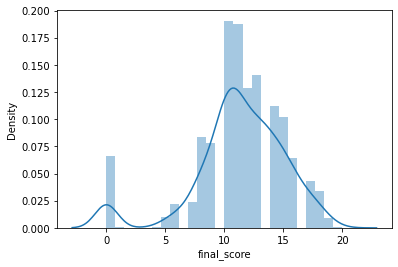

In [30]:
#Plotting the distribution of the final scores.
sns.distplot(student_df['final_score']) 

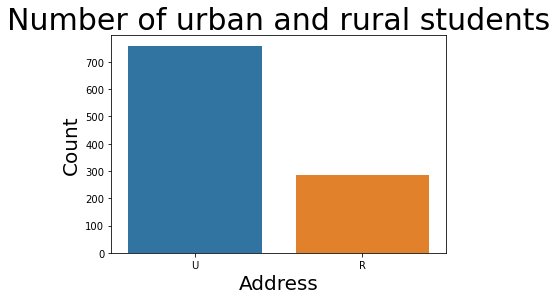

In [31]:
#Finding out the number of urban and rural students
b = sns.countplot(student_df['address'])
b.axes.set_title('Number of urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

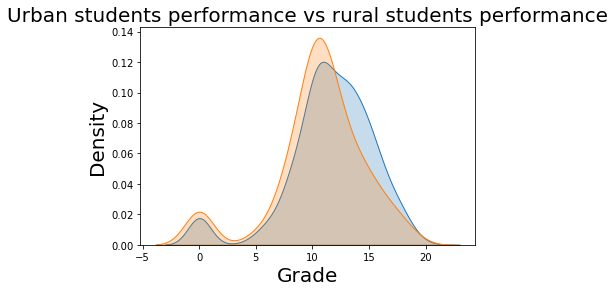

In [32]:
# Grade distribution by address
sns.kdeplot(student_df.loc[student_df['address'] == 'U', 'final_score'], label='Urban', shade = True)
sns.kdeplot(student_df.loc[student_df['address'] == 'R', 'final_score'], label='Rural', shade = True)
plt.title('Urban students performance vs rural students performance', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

#### Not much of a difference between urban and rural students in this particular area

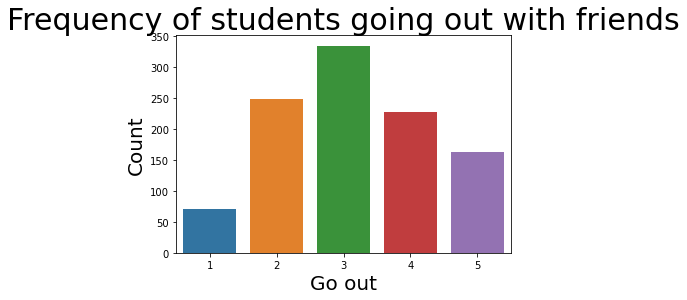

In [33]:
#Distribution of students going out
b = sns.countplot(student_df['go_out_with_friends'])
b.axes.set_title('Frequency of students going out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

#### We can see that most students go out with their friends on average

#### Comparing the students' grades by Relationship status

<Figure size 432x288 with 0 Axes>

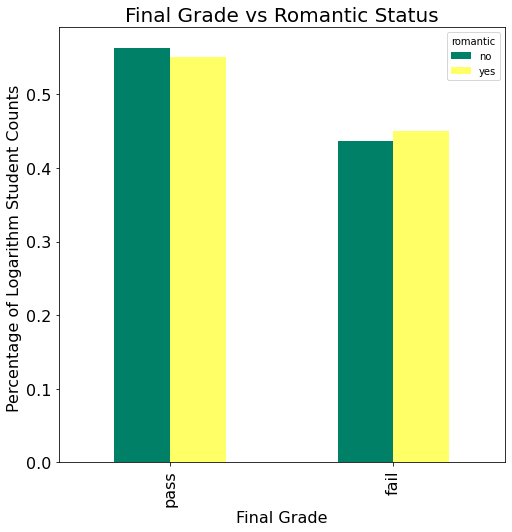

In [34]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['pass','fail']
romance_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title('Final Grade vs Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Sex

<Figure size 432x288 with 0 Axes>

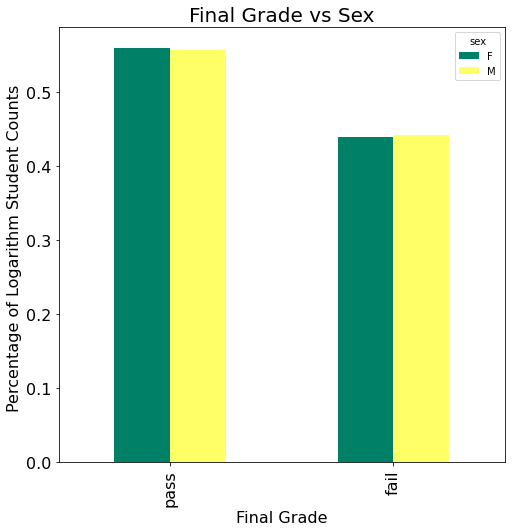

In [35]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
sex_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.sex)
sex_tab = np.log(sex_tab1)
sex_perc = sex_tab.apply(perc).reindex(index)
plt.figure()
sex_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title('Final Grade vs Sex', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Address

<Figure size 432x288 with 0 Axes>

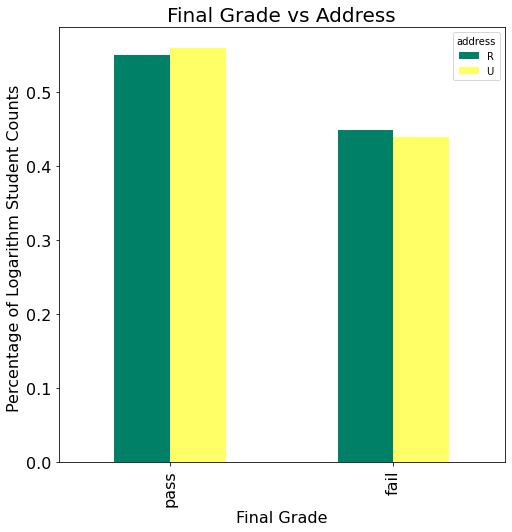

In [36]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
address_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.address)
address_tab = np.log(address_tab1)
address_perc = address_tab.apply(perc).reindex(index)
plt.figure()
address_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title('Final Grade vs Address', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Mother's Job

<Figure size 432x288 with 0 Axes>

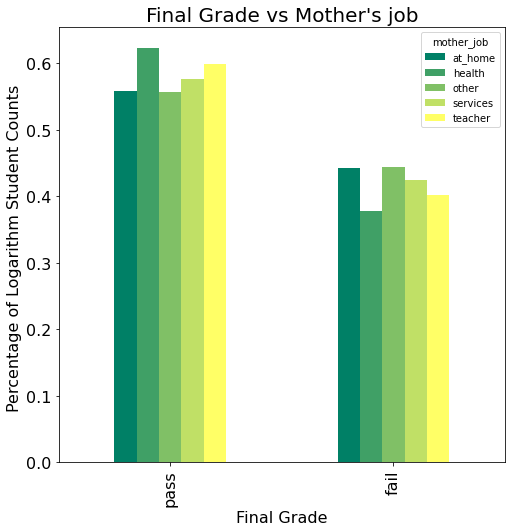

In [37]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
mother_job_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.mother_job)
mother_job_tab = np.log(mother_job_tab1)
mother_job_perc = mother_job_tab.apply(perc).reindex(index)
plt.figure()
mother_job_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Mother's job", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Father's Job

<Figure size 432x288 with 0 Axes>

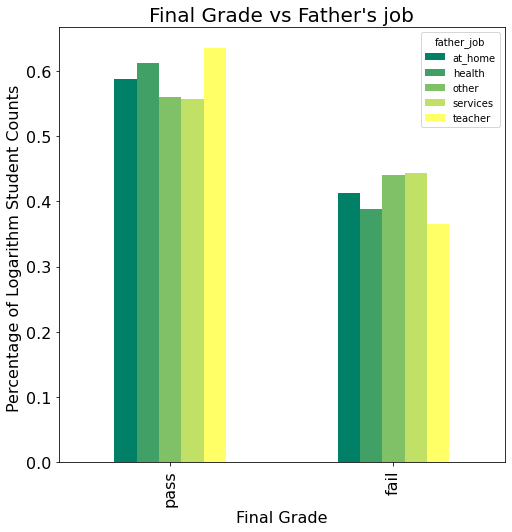

In [38]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
father_job_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.father_job)
father_job_tab = np.log(father_job_tab1)
father_job_perc = father_job_tab.apply(perc).reindex(index)
plt.figure()
father_job_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Father's job", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Mother's Education

<Figure size 432x288 with 0 Axes>

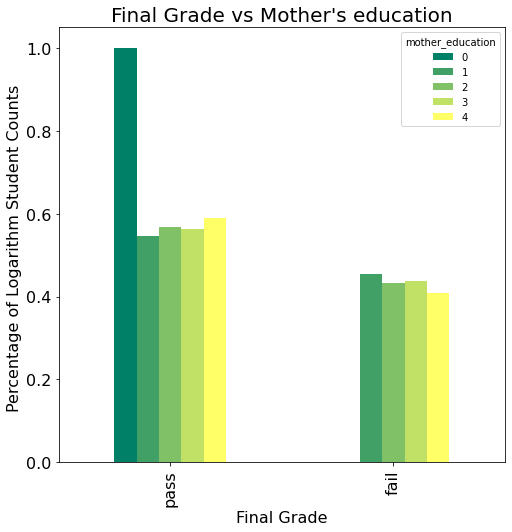

In [39]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
mother_education_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.mother_education)
mother_education_tab = np.log(mother_education_tab1)
mother_education_perc = mother_education_tab.apply(perc).reindex(index)
plt.figure()
mother_education_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Mother's education", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Father's Education

<Figure size 432x288 with 0 Axes>

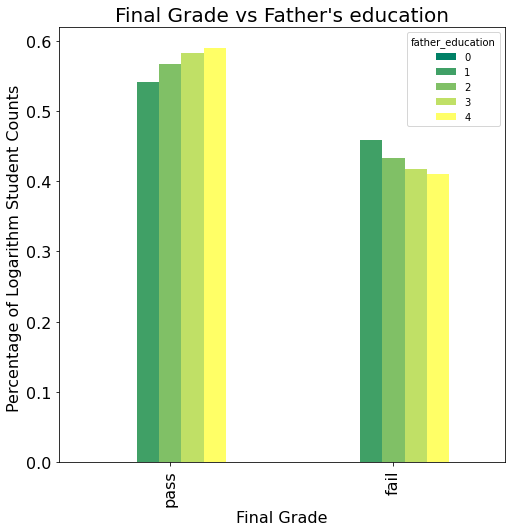

In [40]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
father_education_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.father_education)
father_education_tab = np.log(father_education_tab1)
father_education_perc = father_education_tab.apply(perc).reindex(index)
plt.figure()
father_education_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Father's education", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Desire higher Education

<Figure size 432x288 with 0 Axes>

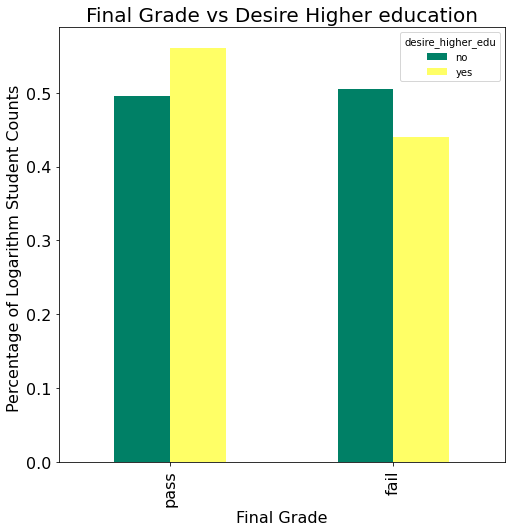

In [41]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
desire_higher_edu_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.desire_higher_edu)
desire_higher_edu_tab = np.log(desire_higher_edu_tab1)
desire_higher_edu_perc = desire_higher_edu_tab.apply(perc).reindex(index)
plt.figure()
desire_higher_edu_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Desire Higher education", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Study time

<Figure size 432x288 with 0 Axes>

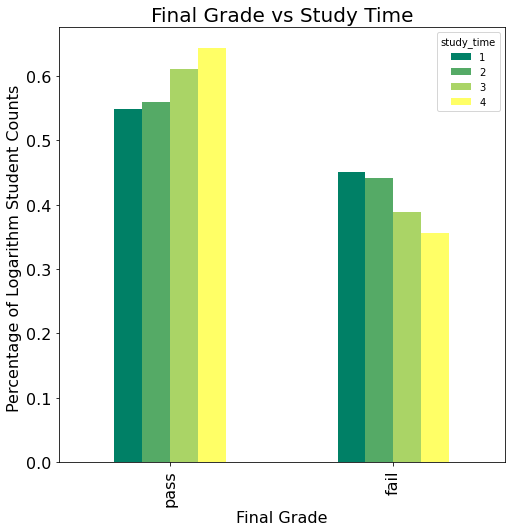

In [42]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
study_time_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.study_time)
study_time_tab = np.log(study_time_tab1)
study_time_perc = study_time_tab.apply(perc).reindex(index)
plt.figure()
study_time_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Study Time", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Internet Access

<Figure size 432x288 with 0 Axes>

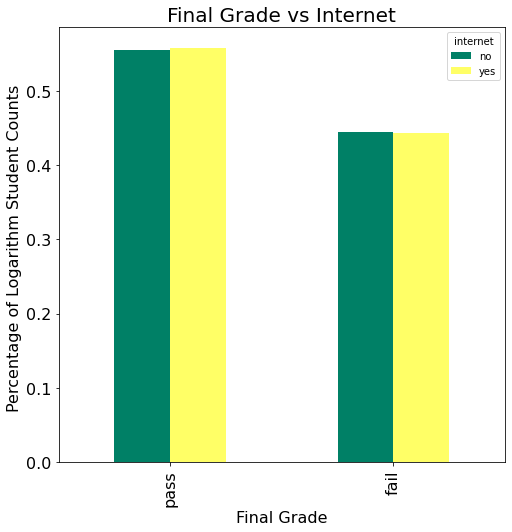

In [43]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
internet_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.internet)
internet_tab = np.log(internet_tab1)
internet_perc = internet_tab.apply(perc).reindex(index)
plt.figure()
internet_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Internet", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Family support status

<Figure size 432x288 with 0 Axes>

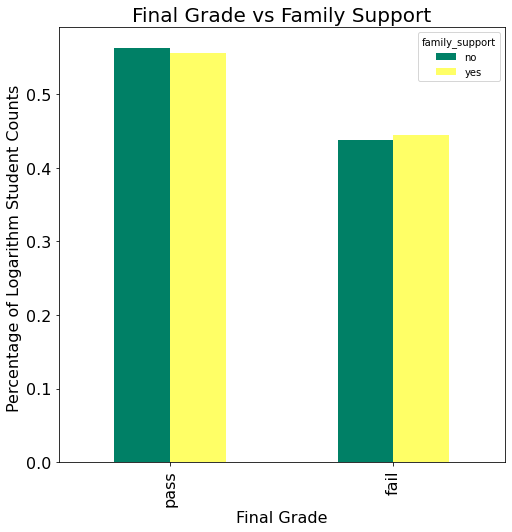

In [44]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
family_support_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.family_support)
family_support_tab = np.log(family_support_tab1)
family_support_perc = family_support_tab.apply(perc).reindex(index)
plt.figure()
family_support_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Family Support", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Parent cohabiting Status

<Figure size 432x288 with 0 Axes>

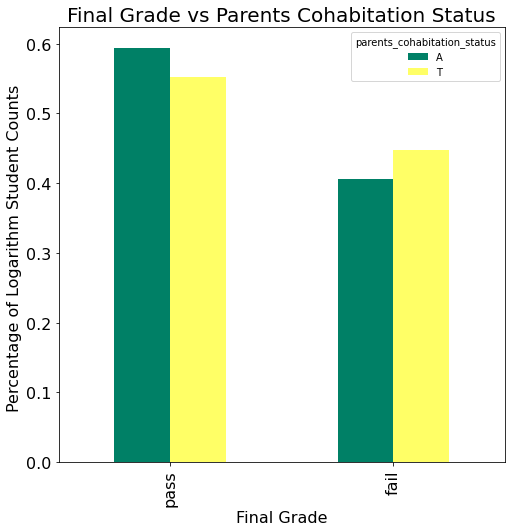

In [45]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
parents_cohabitation_status_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.parents_cohabitation_status)
parents_cohabitation_status_tab = np.log(parents_cohabitation_status_tab1)
parents_cohabitation_status_perc = parents_cohabitation_status_tab.apply(perc).reindex(index)
plt.figure()
parents_cohabitation_status_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Parents Cohabitation Status", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Age

<Figure size 432x288 with 0 Axes>

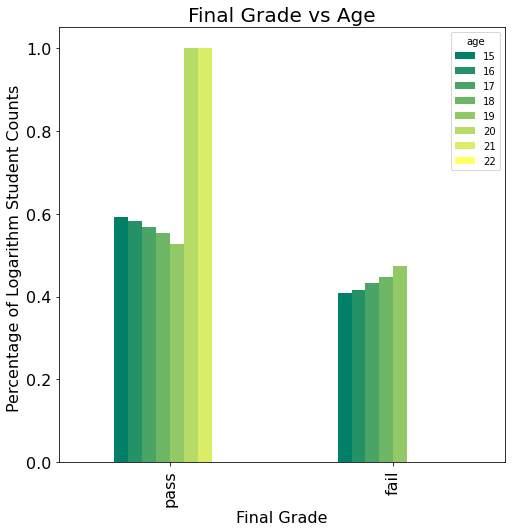

In [46]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
age_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.age)
age_tab = np.log(age_tab1)
age_perc = age_tab.apply(perc).reindex(index)
plt.figure()
age_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Age", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Failures

<Figure size 432x288 with 0 Axes>

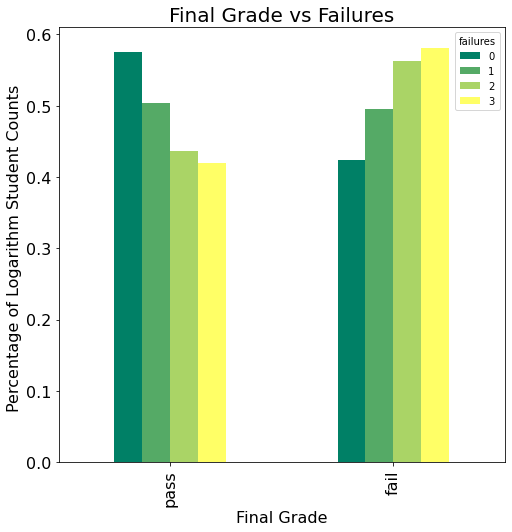

In [47]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
failures_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.failures)
failures_tab = np.log(failures_tab1)
failures_perc = failures_tab.apply(perc).reindex(index)
plt.figure()
failures_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Failures", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Free Time

<Figure size 432x288 with 0 Axes>

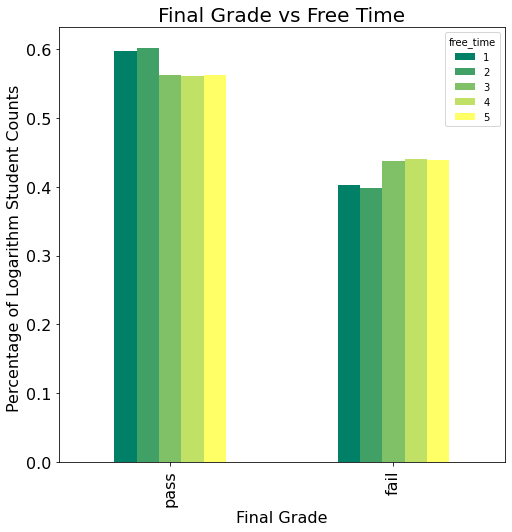

In [48]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
free_time_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.free_time)
free_time_tab = np.log(free_time_tab1)
free_time_perc = free_time_tab.apply(perc).reindex(index)
plt.figure()
free_time_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Free Time", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Weekday alcohol consumption

<Figure size 432x288 with 0 Axes>

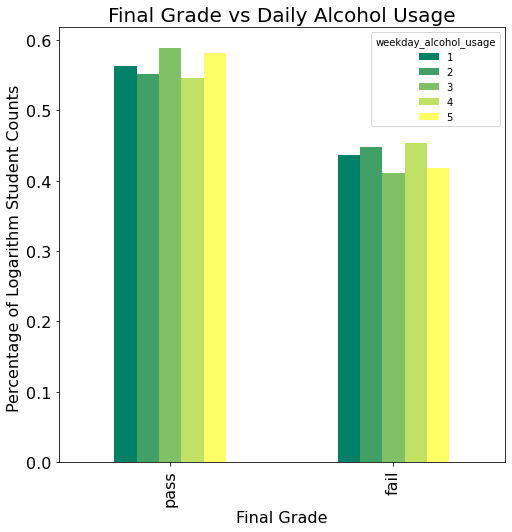

In [49]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
weekday_alcohol_usage_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.weekday_alcohol_usage)
weekday_alcohol_usage_tab = np.log(weekday_alcohol_usage_tab1)
weekday_alcohol_usage_perc = weekday_alcohol_usage_tab.apply(perc).reindex(index)
plt.figure()
weekday_alcohol_usage_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Daily Alcohol Usage", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by Weekend alcohol consumption

<Figure size 432x288 with 0 Axes>

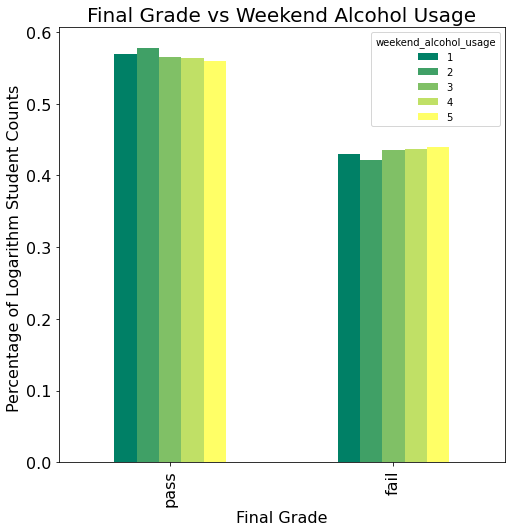

In [50]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
weekend_alcohol_usage_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.weekend_alcohol_usage)
weekend_alcohol_usage_tab = np.log(weekend_alcohol_usage_tab1)
weekend_alcohol_usage_perc = weekend_alcohol_usage_tab.apply(perc).reindex(index)
plt.figure()
weekend_alcohol_usage_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Weekend Alcohol Usage", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades by health

<Figure size 432x288 with 0 Axes>

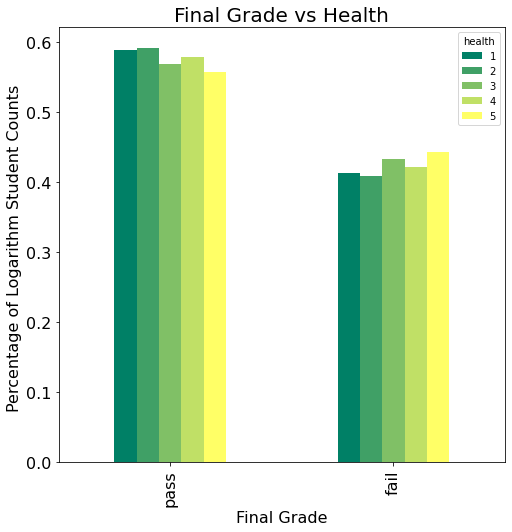

In [51]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
health_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.health)
health_tab = np.log(health_tab1)
health_perc = health_tab.apply(perc).reindex(index)
plt.figure()
health_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Health", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Comparing the students' grades vs Going out with friends

<Figure size 432x288 with 0 Axes>

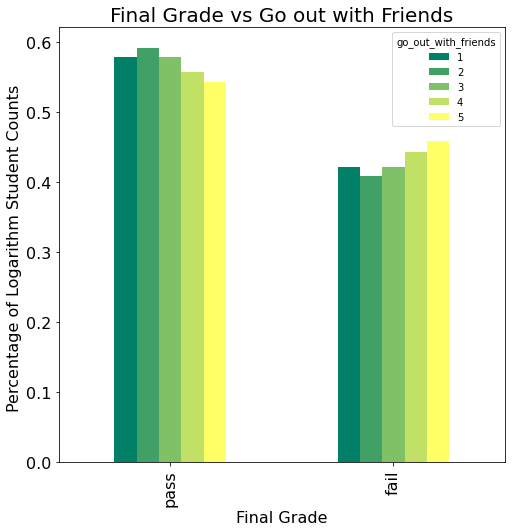

In [52]:
perc = (lambda col: col/col.sum())
index = ['pass','fail']
go_out_with_friends_tab1 = pd.crosstab(index=student_df.final_grade, columns=student_df.go_out_with_friends)
go_out_with_friends_tab = np.log(go_out_with_friends_tab1)
go_out_with_friends_perc = go_out_with_friends_tab.apply(perc).reindex(index)
plt.figure()
go_out_with_friends_perc.plot.bar(colormap="summer", fontsize=16, figsize=(8,8))
plt.title("Final Grade vs Go out with Friends", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Gender Distribution

In [53]:
student_df['sex'].unique()

array(['F', 'M'], dtype=object)

Text(0.5, 1.0, 'Gender Distribution')

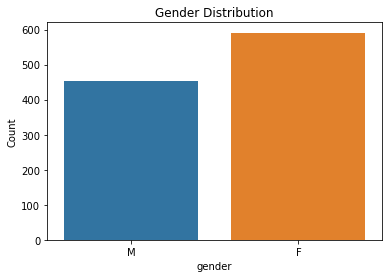

In [54]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'sex', data=student_df, order=['M','F'])
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')

#### School Distribution

In [55]:
student_df['school'].unique()

array(['GP', 'MS'], dtype=object)

Text(0.5, 1.0, 'School Distribution')

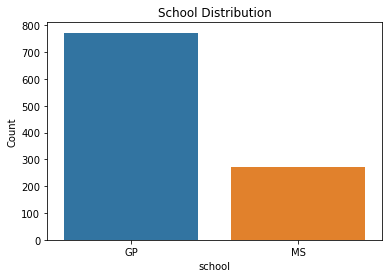

In [56]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'school', data=student_df, order=['GP','MS'])
ax = ax.set(ylabel="Count", xlabel="school")
figure.grid(False)
plt.title('School Distribution')

#### Address Distribution

In [57]:
student_df['address'].unique()

array(['U', 'R'], dtype=object)

Text(0.5, 1.0, 'Address Distribution')

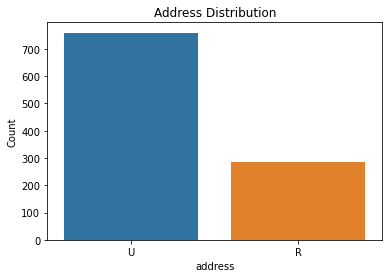

In [58]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'address', data=student_df, order=['U','R'])
ax = ax.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')

#### Age Distribution

In [59]:
student_df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

Text(0.5, 1.0, 'Age Distribution')

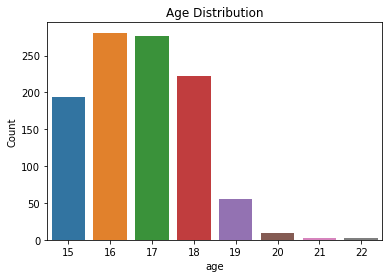

In [60]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=student_df, order=[15,16,17,18,19,20,21,22])
ax = ax.set(ylabel="Count", xlabel="age")
figure.grid(False)
plt.title('Age Distribution')

#### Family Distribution

In [61]:
student_df['family_size'].unique()

array(['GT3', 'LE3'], dtype=object)

Text(0.5, 1.0, 'Family Size Distribution')

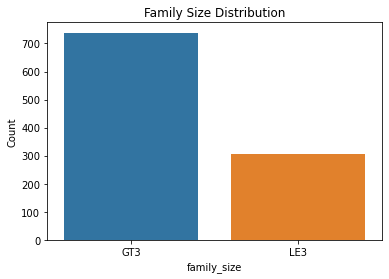

In [62]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'family_size', data=student_df, order=['GT3','LE3'])
ax = ax.set(ylabel="Count", xlabel="family_size")
figure.grid(False)
plt.title('Family Size Distribution')

#### Parent Cohabiting Status Distribution

In [63]:
student_df['parents_cohabitation_status'].unique()

array(['A', 'T'], dtype=object)

Text(0.5, 1.0, 'Parent Cohabiting Status Distribution')

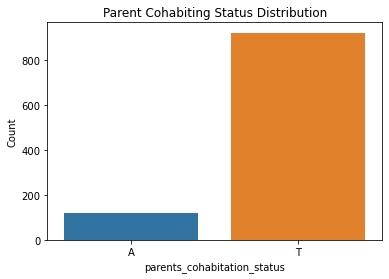

In [64]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'parents_cohabitation_status', data=student_df, order=['A','T'])
ax = ax.set(ylabel="Count", xlabel="parents_cohabitation_status")
figure.grid(False)
plt.title('Parent Cohabiting Status Distribution')

#### Reason to choose Distribution

In [65]:
student_df['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

Text(0.5, 1.0, 'Reason to choose Distribution')

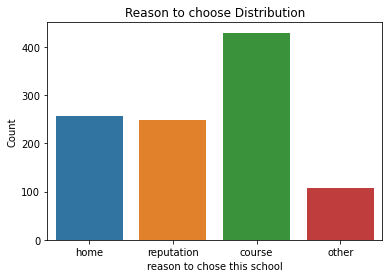

In [66]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=student_df, order=['home','reputation','course','other'])
ax = ax.set(ylabel="Count", xlabel="reason to chose this school")
figure.grid(False)
plt.title("Reason to choose Distribution")

#### Guardian Distribution

In [67]:
student_df['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

Text(0.5, 1.0, 'Guardian Distribution')

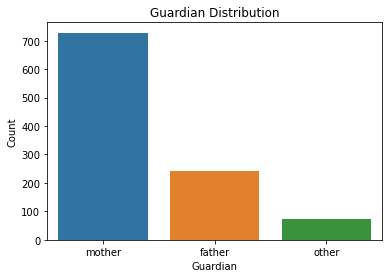

In [68]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'guardian', data=student_df, order=['mother','father','other'])
ax = ax.set(ylabel="Count", xlabel="Guardian")
figure.grid(False)
plt.title("Guardian Distribution")

#### Mother's Education Distribution

In [69]:
student_df['mother_education'].unique()

array([4, 1, 3, 2, 0], dtype=int64)

Text(0.5, 1.0, "Mother's Education Distribution")

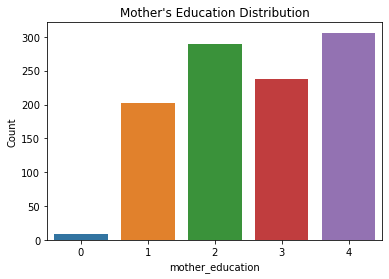

In [70]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'mother_education', data=student_df, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="mother_education")
figure.grid(False)
plt.title("Mother's Education Distribution")

#### Father's Education Distribution

In [71]:
student_df['father_education'].unique()

array([4, 1, 2, 3, 0], dtype=int64)

Text(0.5, 1.0, "Father's Education Distribution")

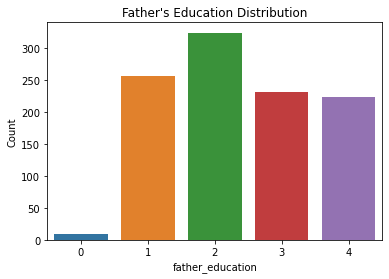

In [72]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'father_education', data=student_df, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="father_education")
figure.grid(False)
plt.title("Father's Education Distribution")

#### Mother's Job Distribution

In [73]:
student_df['mother_job'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

Text(0.5, 1.0, "Mother's Job Distribution")

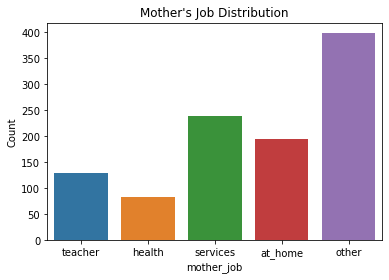

In [74]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'mother_job', data=student_df, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="mother_job")
figure.grid(False)
plt.title("Mother's Job Distribution")

#### Father's Job Distribution

In [75]:
student_df['father_job'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

Text(0.5, 1.0, "Father's Job Distribution")

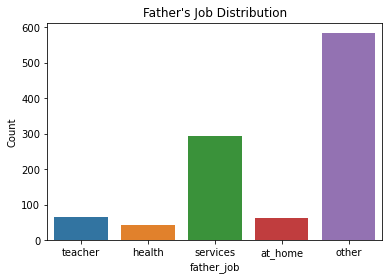

In [76]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'father_job', data=student_df, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="father_job")
figure.grid(False)
plt.title("Father's Job Distribution")

#### Commute time Distribution

In [77]:
student_df['commute_time'].unique()

array([2, 1, 3, 4], dtype=int64)

Text(0.5, 1.0, 'Commute Time Distribution')

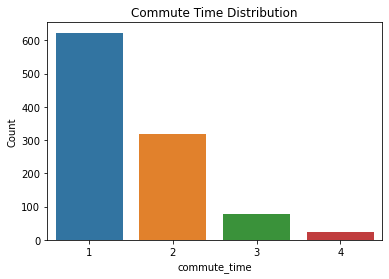

In [78]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'commute_time', data=student_df, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="commute_time")
figure.grid(False)
plt.title('Commute Time Distribution')

#### Study time Distribution

In [79]:
student_df['study_time'].unique()

array([2, 3, 1, 4], dtype=int64)

Text(0.5, 1.0, 'Study Time Distribution')

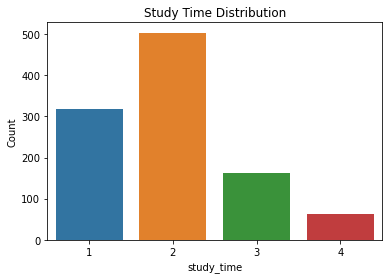

In [80]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'study_time', data=student_df, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="study_time")
figure.grid(False)
plt.title('Study Time Distribution')

#### School Support Distribution

In [81]:
student_df['school_support'].unique()

array(['yes', 'no'], dtype=object)

Text(0.5, 1.0, 'School Support Distribution')

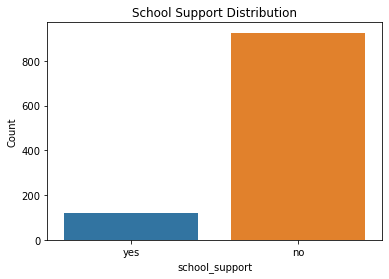

In [82]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'school_support', data=student_df, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="school_support")
figure.grid(False)
plt.title('School Support Distribution')

#### Family Support Distribution

In [83]:
student_df['family_support'].unique()

array(['no', 'yes'], dtype=object)

Text(0.5, 1.0, 'Failure Distribution')

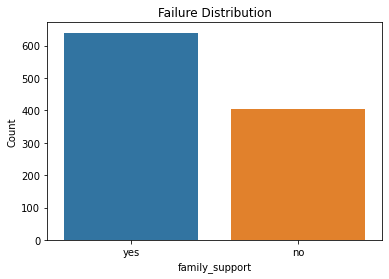

In [84]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'family_support', data=student_df, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="family_support")
figure.grid(False)
plt.title('Failure Distribution')

#### Paid Classes Distribution

In [85]:
student_df['paid_classes'].unique()

array(['no', 'yes'], dtype=object)

Text(0.5, 1.0, 'Paid Classes Distribution')

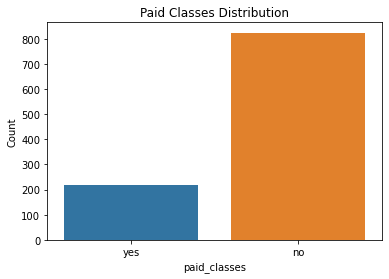

In [86]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'paid_classes', data=student_df, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="paid_classes")
figure.grid(False)
plt.title('Paid Classes Distribution')

#### Internet Distribution

In [87]:
student_df['internet'].unique()

array(['no', 'yes'], dtype=object)

Text(0.5, 1.0, 'Internet Distribution')

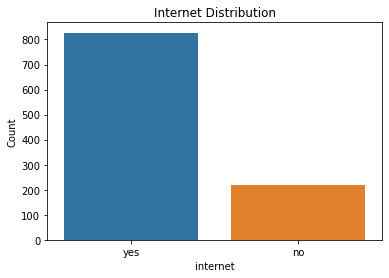

In [88]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'internet', data=student_df, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="internet")
figure.grid(False)
plt.title('Internet Distribution')

#### Failure Distribution

In [89]:
student_df['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Failure Distribution')

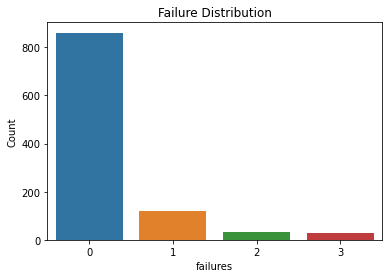

In [90]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=student_df, order=[0,1,2,3])
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('Failure Distribution')

#### From this we can tell that the distribution of the grades is decent and doesn't require any further skewness correction yet. We can go with this distribution for now to analyze the data and create a primitive model and it's error rate first. We can look into data processing of the final grade field afterwards if the results aren't satisfactory.

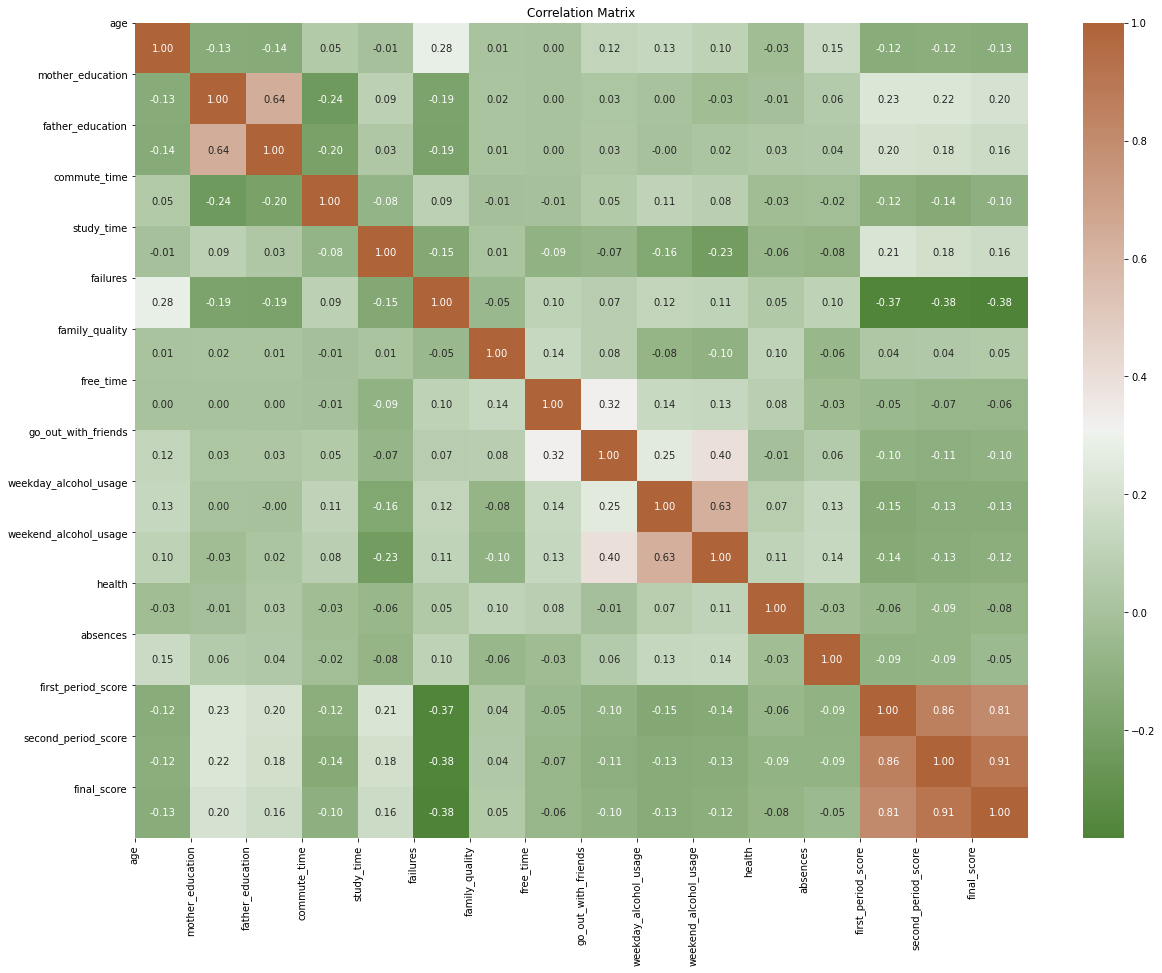

In [91]:
# only works on numerical variables
corr = student_df.corr() 
fig, ax = plt.subplots(figsize=(20, 15))
colormap = sns.diverging_palette(120,30, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()


In [92]:
print (corr['final_score'].sort_values(ascending = False), '\n')

final_score              1.000000
second_period_score      0.910743
first_period_score       0.809142
mother_education         0.201472
study_time               0.161629
father_education         0.159796
family_quality           0.054461
absences                -0.045671
free_time               -0.064890
health                  -0.080079
go_out_with_friends     -0.097877
commute_time            -0.102627
weekend_alcohol_usage   -0.115740
age                     -0.125282
weekday_alcohol_usage   -0.129642
failures                -0.383145
Name: final_score, dtype: float64 



#### From the correlation graph above, we can look at the numerical fields to know the values that affect the end result the most. Obviously first_period_score and second_period_score are the most correlated fields to final score as they are part of the calculation formula for final score so they will have the greatest effect on our prediction. Another thing we can see is the negative correlation between failures and the final score result. This also makes quite a lot of sense as more failures tend to negatively affect your end score. Absences and free time seem to not be very relevant in the dataset that are analyzing which can be a flag that may help us further understand the data in the future.

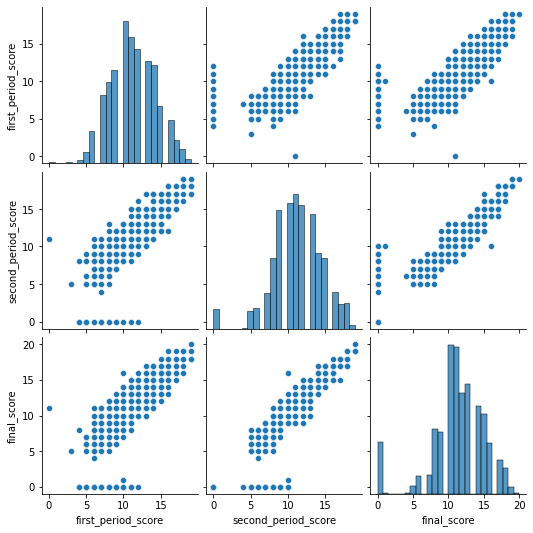

In [93]:
pairplot = sns.pairplot(student_df[["first_period_score", "second_period_score", "final_score"]], palette="summer")
plt.show()

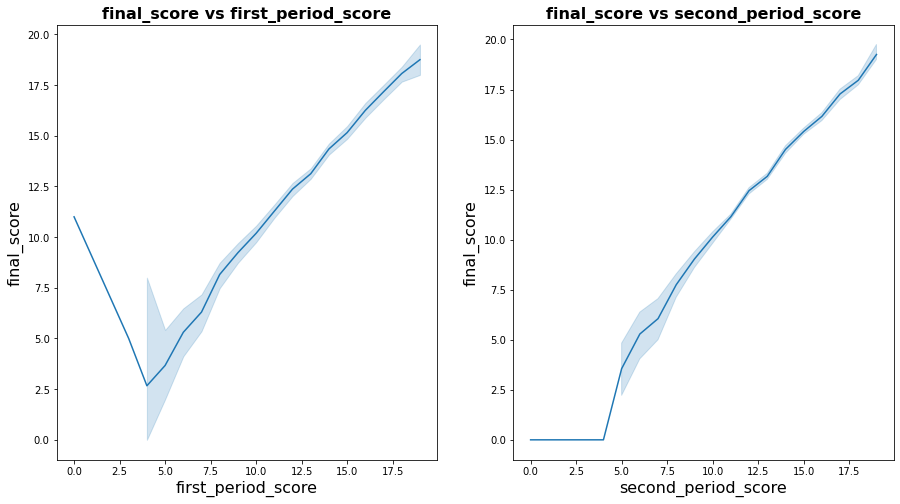

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ax[0] = sns.lineplot(x="first_period_score", y="final_score", data=student_df, palette="viridis", ax=ax[0])
ax[0].set_xlabel('first_period_score',fontdict={"fontsize":16})
ax[0].set_ylabel('final_score',fontdict={"fontsize":16})
ax[0].set_title('final_score vs first_period_score', loc="center", fontdict={"fontsize": 16, "fontweight":"bold"})

ax[1] = sns.lineplot(x="second_period_score", y="final_score", data=student_df, palette="viridis", ax=ax[1])
ax[1].set_xlabel('second_period_score',fontdict={"fontsize":16})
ax[1].set_ylabel('final_score',fontdict={"fontsize":16})
ax[1].set_title('final_score vs second_period_score', loc="center", fontdict={"fontsize": 16, "fontweight":"bold"})


plt.show()

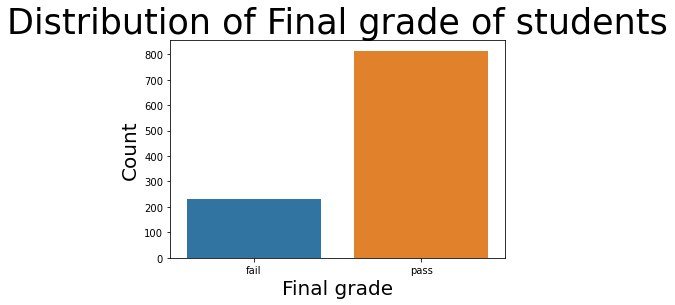

In [95]:
#Distribution of Final grade of students
demo= sns.countplot(student_df['final_grade'])
demo.axes.set_title('Distribution of Final grade of students', fontsize = 35)
demo.set_xlabel('Final grade', fontsize = 20)
demo.set_ylabel('Count', fontsize = 20)
plt.show()

## Boxplots

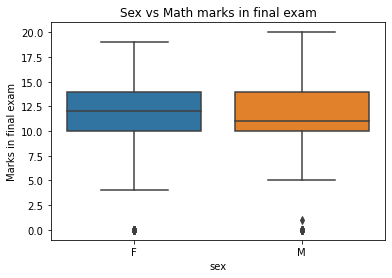

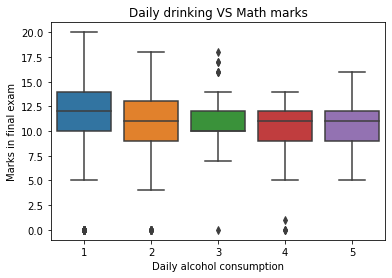

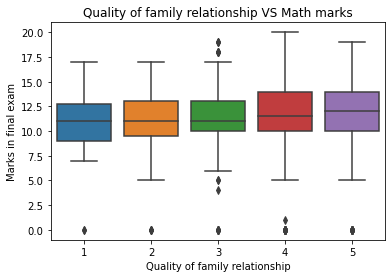

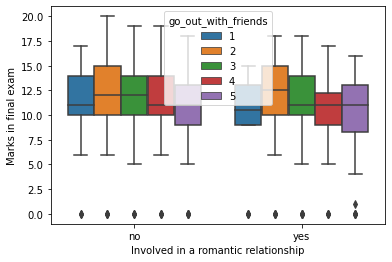

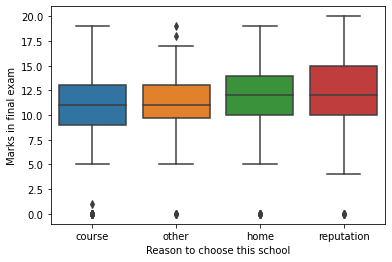

In [96]:
#plt.figure(figsize=(12,7))
plt.title("Sex vs Math marks in final exam")
ax = sns.boxplot(x="sex", y="final_score", data=student_df)
plt.ylabel("Marks in final exam")
plt.show()


plt.title("Daily drinking VS Math marks")
ax = sns.boxplot(x="weekday_alcohol_usage", y="final_score",data=student_df)
plt.xlabel("Daily alcohol consumption")
plt.ylabel("Marks in final exam")
plt.show()

plt.title("Quality of family relationship VS Math marks")
ax=sns.boxplot(x="family_quality",y="final_score",data=student_df)
plt.ylabel("Marks in final exam")
plt.xlabel("Quality of family relationship")
plt.show()


ax = sns.boxplot(x="romantic", y="final_score", hue="go_out_with_friends",
                 data=student_df)
plt.ylabel("Marks in final exam")
plt.xlabel("Involved in a romantic relationship")
plt.show()


ax=sns.boxplot(x="reason",y="final_score",data=student_df)
plt.ylabel("Marks in final exam")
plt.xlabel("Reason to choose this school")
plt.show()

#### Apart from the high number of students scoring 0, the distribution is normal as expected.Maybe the value 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. We cannot be sure

In [97]:
student_df.head()

,school,sex,age,address,family_size,parents_cohabitation_status,mother_education,father_education,mother_job,father_job,...,weekend_alcohol_usage,health,absences,first_period_score,second_period_score,final_score,subject,first_period_grade,second_period_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,mathematics,fail,fail,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,mathematics,fail,fail,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,mathematics,fail,fail,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,mathematics,pass,pass,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,mathematics,fail,pass,pass


In [98]:
student_df.shape

(1044, 37)

In [ ]:
student_df.to_csv('../data/cleaned_students_dataset.csv', index=False)